# Next day rain prediction
An approach to camparing data preparation for next day rain predictions. Final project for Data Science bootcamp organized by Sages.

## Table of contents

1. Abstract

2. About dataset

3. Prerequisites and data load

4. Data understanding

5. Dealing with missing data

6. Final data preparation

7. Model training

8. Scores evaluation

9. Summary

## 1. Abstract

The goal of the project is to compare models metrics for different data preparation of next day rain predictions. On model prediction influence has not only the choosing of the best algorithm and its parameters, but big influence has data preparation and dealing with missing values. The project shows differend ways solving the problem.


## 2. About dataset
Dataset is about Rain in Australia from [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) platform.
Dataset contains from 2007 to 2017 of daily weather observation (145k) for locations across Australia. Due different weather stations collected data, in dataset is many location with 100% missing data for few variables.
Target variable is "RainTomorrow" it means - did it rain the next day.


## 3. Prerequisites and data load

Import of the necessery modules

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import inspect
import time
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


Data load

In [414]:
data_raw = pd.read_csv('weatherAUS.csv')

In [359]:
pd.options.mode.chained_assignment = None

## 4. Data understanding 

In [134]:
def first_look_at_data(df):
    print('Data information')
    print(df.info(),'\n\n')
    print('Number of unique values')
    print(df.nunique(), '\n\n')
    print('RainTomorrow values')
    print(df.RainTomorrow.value_counts(dropna=False),'\n\n')
    return data.describe().T

In [421]:
first_look_at_data(data_raw)

Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  flo

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


First data preparation:
- change Date to datetime type, 
- take day of year, 
- converting 'Yes' and 'No' to 1 and 0 for RainToday, RainTomorrow variables

In [394]:
def first_and_basic_preparation(df, day_of_year=True, month_of_year=False):
    df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
    if day_of_year == True:
        df['DayOfYear'] = df.Date.dt.day_of_year
    if month_of_year == True:
        df['Month'] = df.Date.dt.month
    df.RainToday = df.RainToday.map({'Yes':1,'No':0})
    df.RainTomorrow = df.RainTomorrow.map({'Yes':1,'No':0})
    return df

In [416]:
data = first_and_basic_preparation(data_raw)

In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Object variables vizualization

In [262]:
def object_data_vizualization(df, date_location=True, wind=True, rain=True):
    if date_location == True:
        plt.figure(figsize=(15,4))
        plt.scatter(df.Location,df.Date, marker='.',c='k')
        plt.xticks(rotation=90)
        plt.title('Date for Locations',fontsize=15)
        plt.show()

    if wind == True:
        fig, axs = plt.subplots(1, 3, figsize=(15,8))
        df.WindGustDir.value_counts().plot.pie(autopct = '%1.1f%%', ax=axs[0])
        df.WindDir9am.value_counts().plot.pie(autopct = '%1.1f%%', ax=axs[1])
        df.WindDir3pm.value_counts().plot.pie(autopct = '%1.1f%%', ax=axs[2])
        plt.show()

    if rain == True:
        fig, axs = plt.subplots(1, 2, figsize=(15,3))
        df.RainToday.value_counts(normalize=True).plot(kind='bar', color=['g','b'], rot=0, ax=axs[0])
        axs[0].set_title('RainToday 0(No) and 1(Yes)')
        df.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['g','b'], rot=0, ax=axs[1])
        axs[1].set_title('RainTomorrow 0(No) and 1(Yes)')
        plt.show()


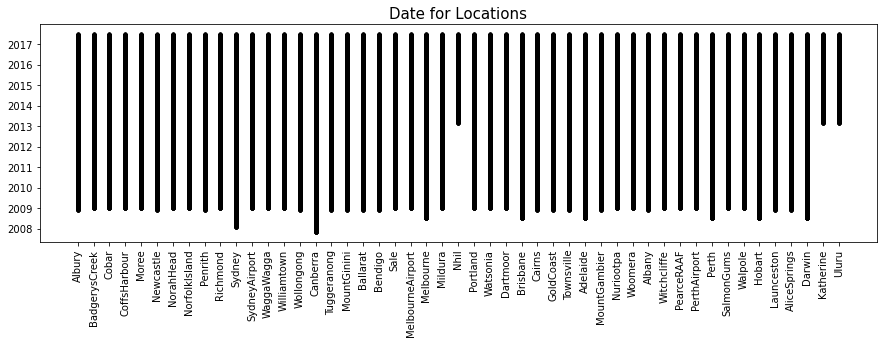

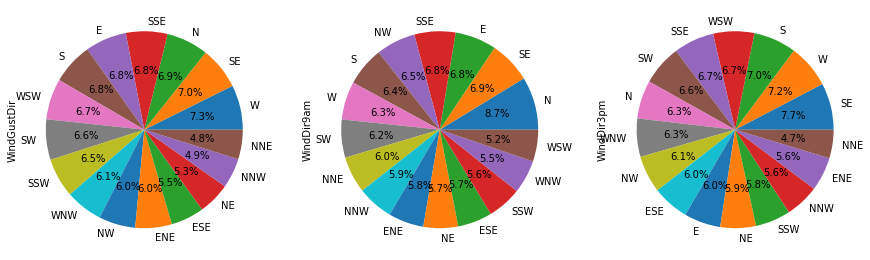

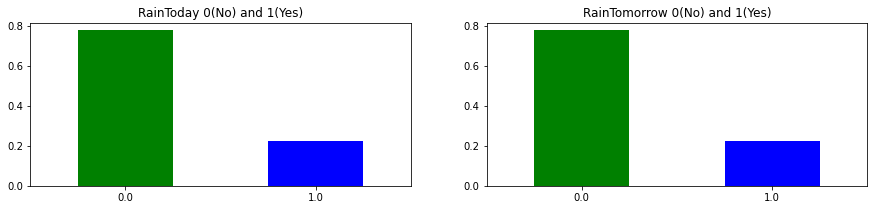

In [263]:
object_data_vizualization(data)

Numeric variables vizualization

In [267]:
def numeric_data_vizualization(df, histograms=True, boxplots=True, correlation=True):
    columns_hist = []
    columns_boxplot = []
    
    for i in df.columns:

        if df[i].dtypes == 'float64':
            columns_hist.append(i)
            if (df[i].max()/3) > df[i].quantile(q=0.75):
                    columns_boxplot.append(i)
    if histograms == True:
        df[columns_hist[:-2]].hist(figsize=(20,10),bins=50)
        plt.suptitle('Histograms',fontsize=15)
        plt.show()
    if boxplots == True:
        df[columns_boxplot[:-2]].boxplot(figsize=(15,3))
        plt.title('Boxplots for variables with outlires',fontsize=15)
        plt.show()
    if correlation == True:
        fig, axs = plt.subplots(figsize=(15,8))
        plt.title('Correlation matrix',fontsize=15)
        sns.heatmap(data.corr(), annot=True, fmt='.1%', cmap="coolwarm", cbar=False)

Distribution of numeric variables

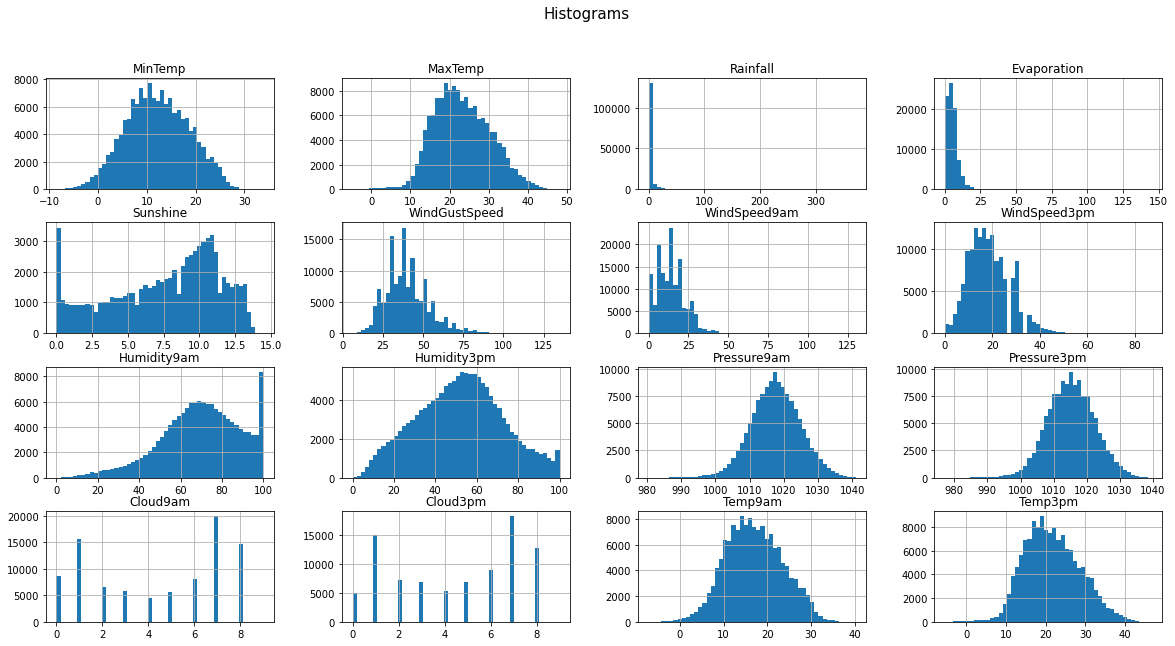

In [265]:
numeric_data_vizualization(data, histograms=True, boxplots=False, correlation=False)

Boxplots for variables with outliers

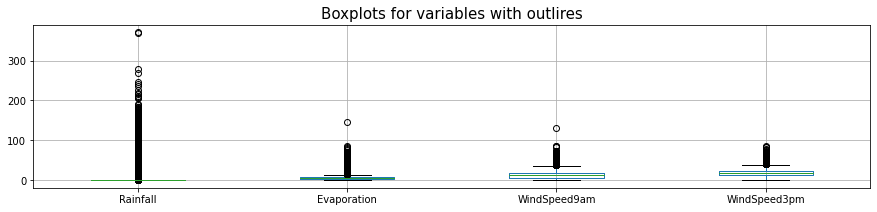

In [268]:
numeric_data_vizualization(data, histograms=False, boxplots=True, correlation=False)

Every above variable has outliers due extreme weather phenomena

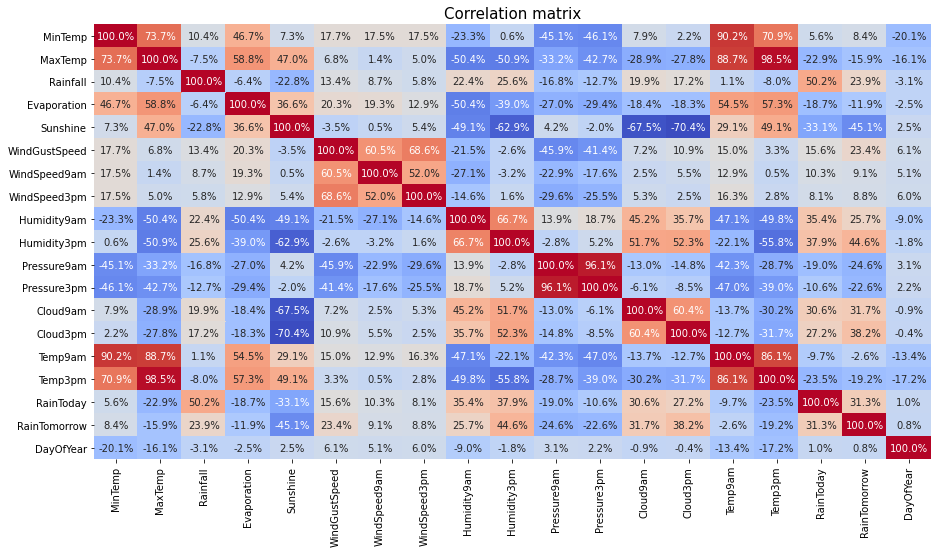

In [269]:
numeric_data_vizualization(data, histograms=False, boxplots=False, correlation=True)

## 5. Dealing with missing data

Missing data for variables [%]

In [140]:
round(data.isna().sum()/len(data)*100,2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
DayOfYear         0.00
dtype: float64

### Droping variables

Functions that will help to check number of missing values for locations

In [1095]:
def check_missing_data_for_location(data, list_name_col, percent=5):
    
    df_of_location = pd.DataFrame({'location': [],
                                   'variable': [],
                                   'size_of_NaN': [],
                                   'size_of_location': [],
                                   'percent_of_NaN':[]})
    
    for name_of_column in list_name_col:
        size_of_missing_data = data[name_of_column].isna().sum()
        size_of_data = data.shape
        percent_of_missing_all = round(size_of_missing_data/size_of_data[0]*100, 2)
        new_variable ={'location': 'ALL', 
                        'variable': name_of_column, 
                        'size_of_NaN': size_of_missing_data,
                        'size_of_location': size_of_data[0],
                        'percent_of_NaN': f'{percent_of_missing_all}%'} 
        df_of_location = df_of_location.append(new_variable, ignore_index=True)
        
        for i in data.Location.unique():
            size_of_missing_data_in_location = data.loc[(data.Location==i) & (data[name_of_column].isna())].shape
            size_of_location = data.loc[data.Location==i].shape
            percent_of_missing = round(size_of_missing_data_in_location[0]/size_of_location[0]*100, 2)
            if percent_of_missing > percent:
                precent_of_NaN_for_all_NaN = round(size_of_missing_data_in_location[0]/size_of_missing_data*100, 2)
                new_location = {'location': i, 
                                'variable': name_of_column, 
                                'size_of_NaN': size_of_missing_data_in_location[0],
                                'size_of_location': size_of_location[0],
                                'percent_of_NaN': f'{percent_of_missing}%',
                                'precent_of_NaN_for_all_NaN': f'{precent_of_NaN_for_all_NaN}%'}
                df_of_location = df_of_location.append(new_location, ignore_index=True)
    return df_of_location

In [142]:
def eliminated_locations_and_variables(df):
    missing = check_missing_data_for_location(df, df.columns, percent=99.99)
    print('Number of locations with 100% missing values for variable:')
    variab = missing.variable[missing.location != 'ALL'].value_counts()
    print(variab,'\n',f'{len(variab)} variables')
    
    print('\n\nNumber of variables with 100% missing values for locations:')
    locat = missing.location[missing.location != 'ALL'].value_counts()
    print(locat)
    print(f'{len(locat)} locations')
    return missing

In [144]:
missing_all_variables_list100 = eliminated_locations_and_variables(data)


Number of locations with 100% missing values for variable:
Sunshine         19
Evaporation      16
Cloud3pm         12
Cloud9am         12
Pressure9am       4
Pressure3pm       4
WindGustDir       2
WindGustSpeed     2
Name: variable, dtype: int64 
 8 variables


Number of variables with 100% missing values for locations
Newcastle        6
MountGinini      6
Penrith          6
SalmonGums       6
NorahHead        4
BadgerysCreek    4
Nhil             4
GoldCoast        4
Tuggeranong      4
Walpole          4
Witchcliffe      4
Ballarat         2
Adelaide         2
Albury           2
Albany           2
Uluru            2
Wollongong       2
Dartmoor         2
Bendigo          1
Richmond         1
PearceRAAF       1
Launceston       1
Katherine        1
Name: location, dtype: int64
23 locations


Deleting all missing data will eliminate 23 locations out of 49

In [173]:
def size_of_data_without_cutted_data(list_of_dfs=[],len_of_all_data=len(data),lamo=False,lamo_list=None,df=None):

    df_sizes = pd.DataFrame({'Name_of_dataframe/number_of_variables':[],
                           'What_was_cutted/what_was_changed':[],
                           'Size_of_data_without_cutted':[],
                            'Percent_of_samples':[]})
    if lamo == True:
        for z in lamo_list:
            sh = df.drop(axis=1, columns=z).dropna().shape[0]

            list_of_dfs.append((sh,z))

    
    for i, j in list_of_dfs:
        callers_local_vars = inspect.currentframe().f_back.f_locals.items()
        if type(i) == int:
            shape_cutted = int(i)
            if type(j) == str:
                name = int(1)
            else: name = int(len(j))

        else: 
            shape_cutted = i.shape[0]
            name = [var_name for var_name, var_val in callers_local_vars if var_val is i][0]
        df_sizes = df_sizes.append({'Name_of_dataframe/number_of_variables': name,
                         'What_was_cutted/what_was_changed': j,
                         'Size_of_data_without_cutted':shape_cutted,
                         'Percent_of_samples':f'{round(shape_cutted/len(data)*100, 2)}%'}, ignore_index=True)
    
    return df_sizes

Data with full original values

In [345]:
df_full = data.dropna()

Check how first deleting variables or lists of variables, then drop all NaNs will change a size of data

Variables with 100% missing data for some locations:

In [146]:
a = missing_all_variables_list100.variable[missing_all_variables_list100.location != 'ALL'].value_counts().index
a

Index(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Pressure9am',
       'Pressure3pm', 'WindGustDir', 'WindGustSpeed'],
      dtype='object')

In [147]:
b = a.to_list()
b.append(a[:2].to_list())
b.append(a[:4].to_list())
b.append(a[:6].to_list())
b.append(a.to_list())
b

['Sunshine',
 'Evaporation',
 'Cloud3pm',
 'Cloud9am',
 'Pressure9am',
 'Pressure3pm',
 'WindGustDir',
 'WindGustSpeed',
 ['Sunshine', 'Evaporation'],
 ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'],
 ['Sunshine',
  'Evaporation',
  'Cloud3pm',
  'Cloud9am',
  'Pressure9am',
  'Pressure3pm'],
 ['Sunshine',
  'Evaporation',
  'Cloud3pm',
  'Cloud9am',
  'Pressure9am',
  'Pressure3pm',
  'WindGustDir',
  'WindGustSpeed']]

In [148]:
c = size_of_data_without_cutted_data([(df_full,'All missing data')],lamo=True,lamo_list=b,df=data)
c

,Name_of_dataframe/number_of_variables,What_was_cutted/what_was_changed,Size_of_data_without_cutted,Percent_of_samples
0,df_full,All missing data,56420.0,38.79%
1,1,Sunshine,61981.0,42.61%
2,1,Evaporation,58278.0,40.06%
3,1,Cloud3pm,57806.0,39.74%
4,1,Cloud9am,56613.0,38.92%
5,1,Pressure9am,56452.0,38.81%
6,1,Pressure3pm,56437.0,38.8%
7,1,WindGustDir,56429.0,38.79%
8,1,WindGustSpeed,56420.0,38.79%
9,2,"[Sunshine, Evaporation]",71045.0,48.84%


Data with deleted all missing data is 38.79%
Data with deleted variables: Sunshine, Evaporation, Cloud3pm, Cloud9am then deleted missing data is 77.63%
It's 38.84% more data.
The rest of variables don't pay off to cut, because deleting Pressure9am, Pressure3pm will get only 6.1% of data and deleting WindGustDir, WindGustSpeed will get next only 3.6%

In [346]:
df_SECC_n = data.drop(axis=1, columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am'])

In [164]:
missing100_df_SECC = eliminated_locations_and_variables(df_SECC_n)

Number of locations with 100% missing values for variable:
Pressure3pm      4
Pressure9am      4
WindGustSpeed    2
WindGustDir      2
Name: variable, dtype: int64 
 4 variables


Number of variables with 100% missing values for locations
Newcastle      4
Albany         2
SalmonGums     2
MountGinini    2
Penrith        2
Name: location, dtype: int64
5 locations


In [165]:
missing100_df_SECC

,location,variable,size_of_NaN,size_of_location,percent_of_NaN,precent_of_NaN_for_all_NaN
0,ALL,Date,0.0,145460.0,0.0%,NaN
1,ALL,Location,0.0,145460.0,0.0%,NaN
2,ALL,MinTemp,1485.0,145460.0,1.02%,NaN
3,ALL,MaxTemp,1261.0,145460.0,0.87%,NaN
4,ALL,Rainfall,3261.0,145460.0,2.24%,NaN
5,ALL,WindGustDir,10326.0,145460.0,7.1%,NaN
6,Newcastle,WindGustDir,3039.0,3039.0,100.0%,29.43%
7,Albany,WindGustDir,3040.0,3040.0,100.0%,29.44%
8,ALL,WindGustSpeed,10263.0,145460.0,7.06%,NaN
9,Newcastle,WindGustSpeed,3039.0,3039.0,100.0%,29.61%


Deleting all missing data after deleting variables (Sunshine, Evaporation, Cloud3pm, Cloud9am) will eliminate 5 locations out of 49

In [166]:
a = missing100_df_SECC.variable[missing100_df_SECC.location != 'ALL'].value_counts().index
a

Index(['Pressure3pm', 'Pressure9am', 'WindGustSpeed', 'WindGustDir'], dtype='object')

In [167]:
b = a.to_list()
b.append(a[:2].to_list())
b.append(a[2:].to_list())
b.append(a.to_list())
b

['Pressure3pm',
 'Pressure9am',
 'WindGustSpeed',
 'WindGustDir',
 ['Pressure3pm', 'Pressure9am'],
 ['WindGustSpeed', 'WindGustDir'],
 ['Pressure3pm', 'Pressure9am', 'WindGustSpeed', 'WindGustDir']]

In [347]:
df_SECC = df_SECC_n.dropna()

In [178]:
lista = [(df_full, 'All missing data'),
         (df_SECC, ['Sunshine','Evaporation','Cloud3pm','Cloud9am'])]

In [179]:
size_of_data_without_cutted_data(lista, lamo=True, lamo_list=b, df=df_SECC_n)

,Name_of_dataframe/number_of_variables,What_was_cutted/what_was_changed,Size_of_data_without_cutted,Percent_of_samples
0,df_full,All missing data,56420.0,38.79%
1,df_SECC,"[Sunshine, Evaporation, Cloud3pm, Cloud9am]",112925.0,77.63%
2,1,Pressure3pm,112960.0,77.66%
3,1,Pressure9am,113011.0,77.69%
4,1,WindGustSpeed,112925.0,77.63%
5,1,WindGustDir,112938.0,77.64%
6,2,"[Pressure3pm, Pressure9am]",121790.0,83.73%
7,2,"[WindGustSpeed, WindGustDir]",117068.0,80.48%
8,4,"[Pressure3pm, Pressure9am, WindGustSpeed, Wind...",127033.0,87.33%


It doesn't pay off to cut more variables

### Different approach to dealing with missing data

In [397]:
miss=data.isna().sum()/len(data)*100
round(miss,2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
DayOfYear         0.00
dtype: float64

To replace data first there is a need to drop missing data from the target variable and the variable from  which is made. 

In [373]:
df_new = data.dropna(subset = ['RainTomorrow','RainToday'])

In [945]:
miss=df_new.isna().sum()/len(df_new)*100
round(miss,2)

Date              0.00
Location          0.00
MinTemp           0.33
MaxTemp           0.22
Rainfall          0.00
Evaporation      42.40
Sunshine         47.45
WindGustDir       6.51
WindGustSpeed     6.47
WindDir9am        6.86
WindDir3pm        2.61
WindSpeed9am      0.75
WindSpeed3pm      1.80
Humidity9am       1.08
Humidity3pm       2.49
Pressure9am       9.76
Pressure3pm       9.78
Cloud9am         37.38
Cloud3pm         39.84
Temp9am           0.47
Temp3pm           1.86
RainToday         0.00
RainTomorrow      0.00
DayOfYear         0.00
dtype: float64

Replacement missing data with mode:

In [378]:
df_mode = df_new.copy()
for i in df_mode.columns:
    df_mode[i].fillna(df_mode[i].mode()[0], inplace = True)


Replacement missing data for object variables by random sample of items from values for each column.
Replacement missing data for numeric variables by mean and median.

In [383]:
df_mean = df_new.copy()
df_median = df_new.copy()

for i in df_mean.columns:
    if df_mean[i].dtype == 'O':
        df_mean[i][np.array(df_mean[i].isna())] = np.array(df_mean[i][~df_mean[i].isna()].sample(df_mean[i].isna().sum()))
        df_median[i][np.array(df_median[i].isna())] = np.array(df_median[i][~df_median[i].isna()].sample(df_median[i].isna().sum()))
    else:
        df_mean[i].fillna(df_mean[i].mean(), inplace=True)
        df_median[i].fillna(df_median[i].median(), inplace=True)


Replacement missing data for variables by random sample of items from values for each month for each column.

In [420]:
df_M = data.copy()

In [422]:
df_M["Month"] = df_M.Date.dt.month

In [425]:
df_M.dropna(subset = ['RainTomorrow','RainToday'], inplace=True)

In [445]:
for i in df_M.columns:
    for j in df_M.Month.unique():
        df_M[i][np.array((df_M[i].isna()) & (df_M.Month == j))] = np.array(df_M[i][(~df_M[i].isna()) & (df_M.Month == j)].sample(((df_M[i].isna()) & (df_M.Month == j)).sum()))
        

Finally size of all DataFrames and percent of samples from original data

In [946]:
list_of_all_dfs = [(df_full, 'All missing data'),
         (df_SECC, ['Sunshine','Evaporation','Cloud3pm','Cloud9am']),
         (df_new, ['RainToday','RainTomorrow']),
         (df_mode, 'Filled mode and drop Rain'),
         (df_median, 'Filled median and drop Rain'),
         (df_mean, 'Filled mean and drop Rain'),
         (df_M, 'Filled by sample for month')]

In [947]:
size_of_data_without_cutted_data(list_of_all_dfs, lamo=False)

,Name_of_dataframe/number_of_variables,What_was_cutted/what_was_changed,Size_of_data_without_cutted,Percent_of_samples
0,df_full,All missing data,56420.0,38.79%
1,df_SECC,"[Sunshine, Evaporation, Cloud3pm, Cloud9am]",112925.0,77.63%
2,df_new,"[RainToday, RainTomorrow]",140787.0,96.79%
3,df_mode,Filled mode and drop Rain,140787.0,96.79%
4,df_median,Filled median and drop Rain,140787.0,96.79%
5,df_mean,Filled mean and drop Rain,140787.0,96.79%
6,df_M,Filled by sample for month,140787.0,96.79%


### Vizualizaton of changed data

Below figures shows arrangement of data for different data preparation

DataFrame with dropped all missing data:

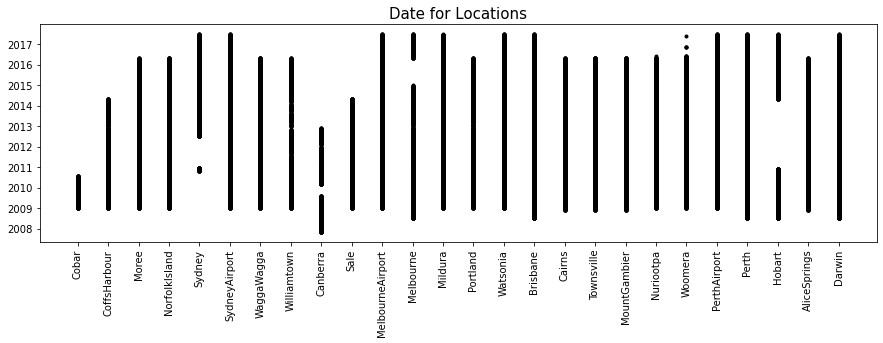

In [452]:
object_data_vizualization(df_full, date_location=True, wind=False, rain=False)

DataFrame with dropped all missing data after deleting variables (Sunshine, Evaporation, Cloud3pm, Cloud9am):

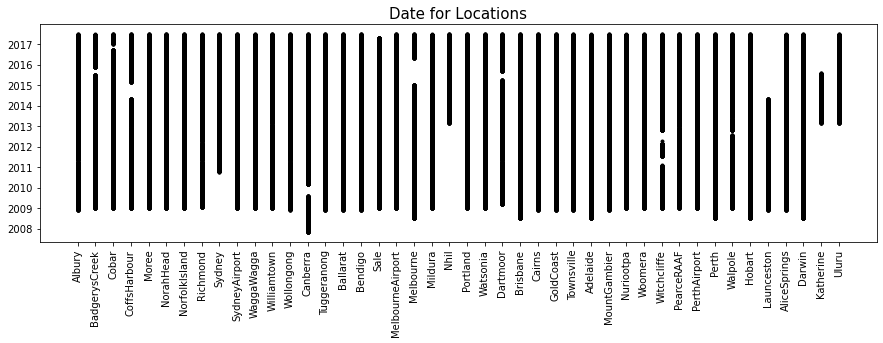

In [453]:
object_data_vizualization(df_SECC, date_location=True, wind=False, rain=False)

Representation of DataFrames (df_mode, df_median, df_mean, df_M) with dropped Rain missing values:

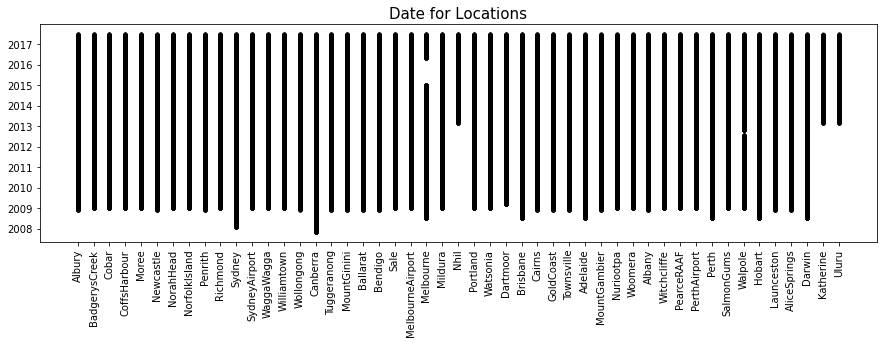

In [948]:
object_data_vizualization(df_mean, date_location=True, wind=False, rain=False)

Below figures shows wind directions:

DataFrame with dropped all missing data:

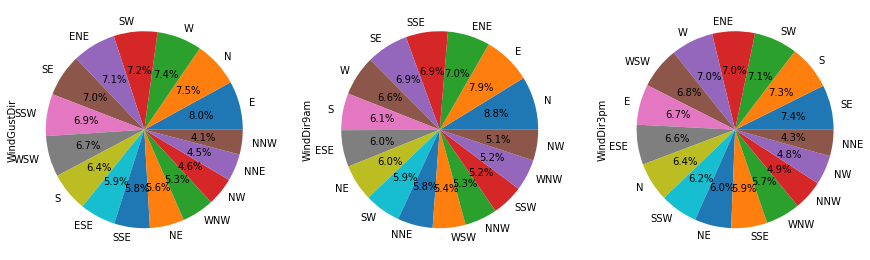

In [949]:
object_data_vizualization(df_full, date_location=False, wind=True, rain=False)

DataFrame with missing data filled by mode:

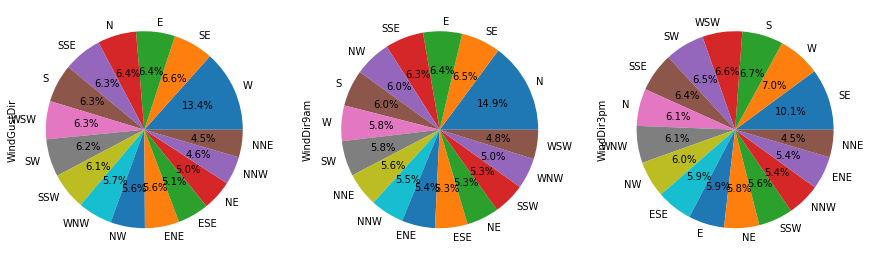

In [456]:
object_data_vizualization(df_mode, date_location=False, wind=True, rain=False)

Representation of DataFrames filled by random sample of items from values for wind.

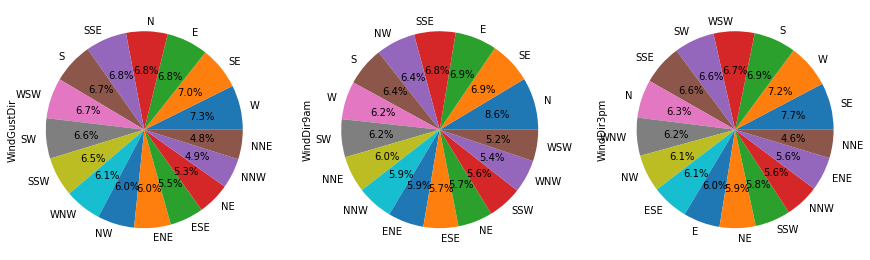

In [950]:
object_data_vizualization(df_mean, date_location=False, wind=True, rain=False)

DataFrames filled by random sample of items from values for wind for each month.

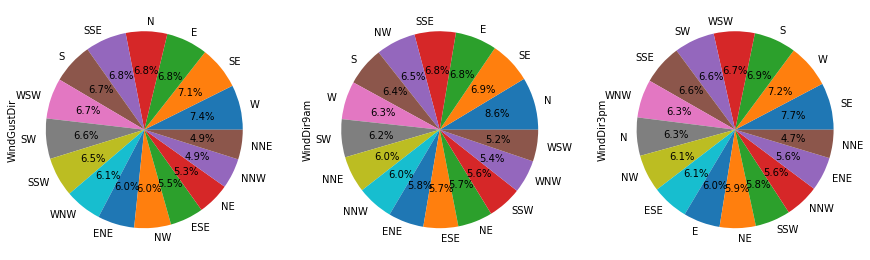

In [457]:
object_data_vizualization(df_M, date_location=False, wind=True, rain=False)

Numeric data distribution for different data preparation

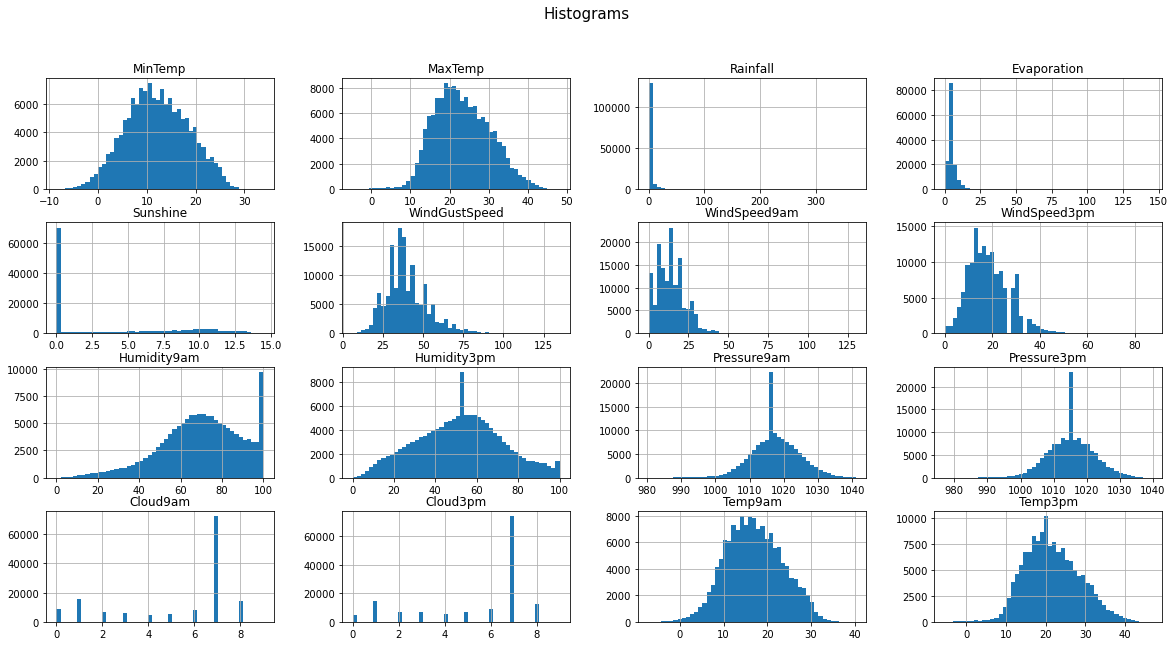

In [278]:
numeric_data_vizualization(df_mode, histograms=True, boxplots=False, correlation=False)

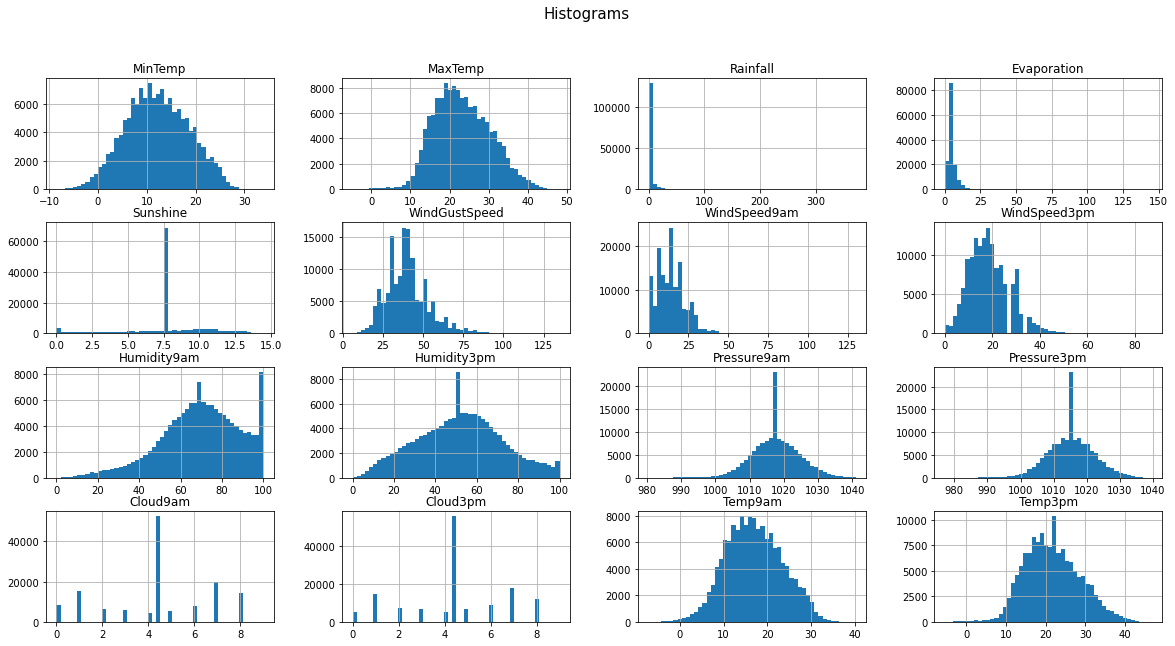

In [279]:
numeric_data_vizualization(df_mean, histograms=True, boxplots=False, correlation=False)

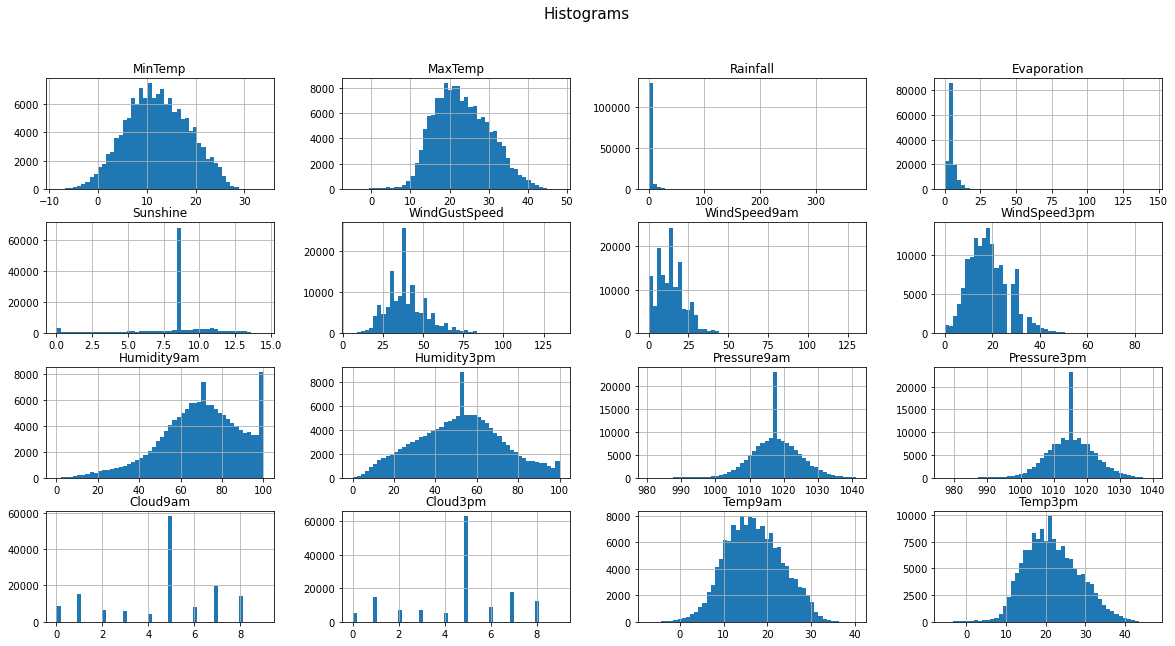

In [280]:
numeric_data_vizualization(df_median, histograms=True, boxplots=False, correlation=False)

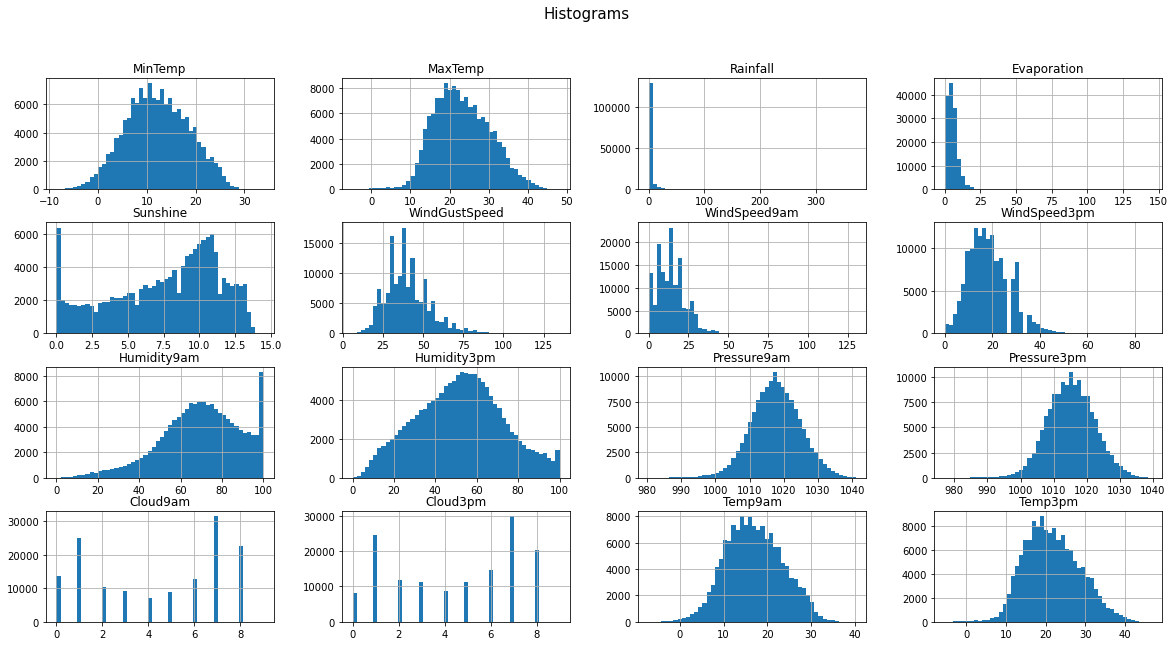

In [458]:
numeric_data_vizualization(df_M, histograms=True, boxplots=False, correlation=False)

Ratio of target variable

In [1032]:
def ratio_of_y(Rain):
    rain_count = Rain.value_counts()
    print(rain_count)
    rain_count.plot(kind='bar', color=['g','b'], rot=0)
    plt.title('RainTomorrow values ratio 1(Yes) and 0(No)')
    plt.show()
    print(f'Percent of No:\t{round(rain_count[0]/rain_count.sum()*100, 2)}%')
    print(f'Percent of Yes:\t{round(rain_count[1]/rain_count.sum()*100, 2)}%')


0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64


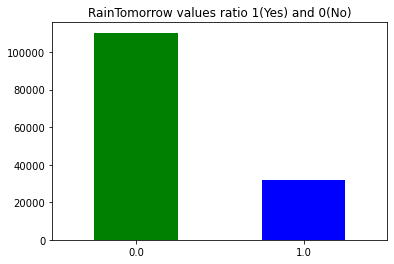

Percent of No:	77.58%
Percent of Yes:	22.42%


In [1033]:
ratio_of_y(data.RainTomorrow)

0.0    43993
1.0    12427
Name: RainTomorrow, dtype: int64


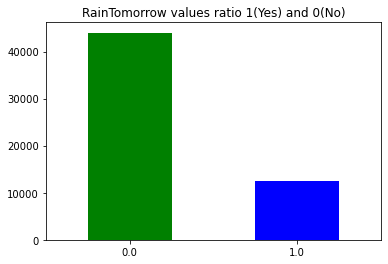

Percent of No:	77.97%
Percent of Yes:	22.03%


In [1034]:
ratio_of_y(df_full.RainTomorrow)

0.0    87906
1.0    25019
Name: RainTomorrow, dtype: int64


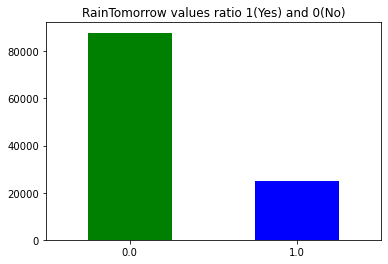

Percent of No:	77.84%
Percent of Yes:	22.16%


In [1035]:
ratio_of_y(df_SECC.RainTomorrow)

0.0    109586
1.0     31201
Name: RainTomorrow, dtype: int64


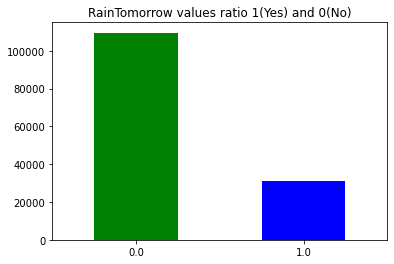

Percent of No:	77.84%
Percent of Yes:	22.16%


In [1036]:
ratio_of_y(df_M.RainTomorrow)

Data is imbalanced

## 6. Final data preparation

Final data preparation:
- separate target,
- dropping column with Date,
- dropping column with location and/or month (optional)
- encoding object variables,
- split for train and test set,
- balancing data with SMOTE

In [467]:

def Xy_preparation(df, split_ratio, location_off=True, months=False):
    
    y = df.RainTomorrow
    X = df.drop(columns=['RainTomorrow','Date'])
    if months == True:
        X.drop(columns='Month', inplace=True)
    if location_off == True:
        X.drop(columns='Location', inplace=True)
    X = pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)
    smt = SMOTE()
    X_train, y_train = smt.fit_resample(X_train,y_train)
    print(f'X_train shape:\t{X_train.shape}\nX_test shape:\t{X_test.shape}')
    return X_train, X_test, y_train, y_test

In [46]:
X_train_full, X_test_full, y_train_full, y_test_full = Xy_preparation(df_full, split_ratio=0.1, location_off=False)

X_train shape:	(79284, 92)
X_test shape:	(5642, 92)


In [468]:
X_train_full_l, X_test_full_l, y_train_full_l, y_test_full_l = Xy_preparation(df_full, split_ratio=0.1, location_off=True)

X_train shape:	(79284, 66)
X_test shape:	(5642, 66)


In [470]:
X_train_SECC, X_test_SECC, y_train_SECC, y_test_SECC = Xy_preparation(df_SECC, split_ratio=0.1, location_off=False)

X_train shape:	(158242, 106)
X_test shape:	(11293, 106)


In [469]:
X_train_SECC_l, X_test_SECC_l, y_train_SECC_l, y_test_SECC_l = Xy_preparation(df_SECC, split_ratio=0.1, location_off=True)

X_train shape:	(158242, 62)
X_test shape:	(11293, 62)


In [863]:
X_train_M_l, X_test_M_l, y_train_M_l, y_test_M_l = Xy_preparation(df_M, split_ratio=0.1, location_off=True, months=True)

X_train shape:	(197384, 66)
X_test shape:	(14079, 66)


In [864]:
X_train_M, X_test_M, y_train_M, y_test_M = Xy_preparation(df_M, split_ratio=0.1, location_off=False, months=True)

X_train shape:	(197384, 115)
X_test shape:	(14079, 115)


In [824]:
X_train_mode_l, X_test_mode_l, y_train_mode_l, y_test_mode_l = Xy_preparation(df_mode, split_ratio=0.1, location_off=True)

X_train shape:	(197384, 66)
X_test shape:	(14079, 66)


In [860]:
X_train_mode, X_test_mode, y_train_mode, y_test_mode = Xy_preparation(df_mode, split_ratio=0.1, location_off=False)

X_train shape:	(197384, 115)
X_test shape:	(14079, 115)


In [825]:
X_train_median_l, X_test_median_l, y_train_median_l, y_test_median_l = Xy_preparation(df_median, split_ratio=0.1, location_off=True)

X_train shape:	(197384, 66)
X_test shape:	(14079, 66)


In [861]:
X_train_median, X_test_median, y_train_median, y_test_median = Xy_preparation(df_median, split_ratio=0.1, location_off=False)

X_train shape:	(197384, 115)
X_test shape:	(14079, 115)


In [826]:
X_train_mean_l, X_test_mean_l, y_train_mean_l, y_test_mean_l = Xy_preparation(df_mean, split_ratio=0.1, location_off=True)

X_train shape:	(197384, 66)
X_test shape:	(14079, 66)


In [862]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = Xy_preparation(df_mean, split_ratio=0.1, location_off=False)

X_train shape:	(197384, 115)
X_test shape:	(14079, 115)


Checking the balance of data:

0.0    39642
1.0    39642
Name: RainTomorrow, dtype: int64


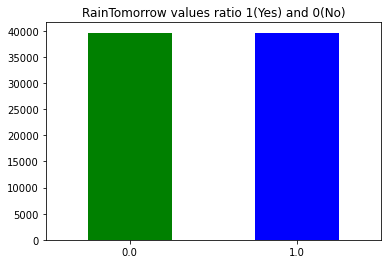

Percent of No:	50.0%
Percent of Yes:	50.0%


In [1037]:
ratio_of_y(y_train_full)

0.0    4351
1.0    1291
Name: RainTomorrow, dtype: int64


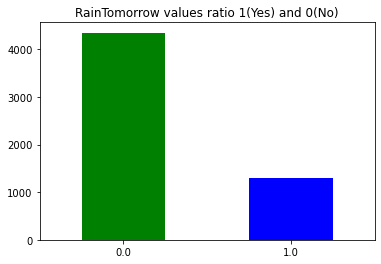

Percent of No:	77.12%
Percent of Yes:	22.88%


In [1038]:
ratio_of_y(y_test_full)

## 7. Model training

Looking for the best model:

In [24]:
def pipel (df_X, df_y, model, search):
    pipeline = Pipeline(model)
    param_grid = search
    optimizer = GridSearchCV(pipeline,param_grid,cv=5,n_jobs=-1)
    optimizer.fit(df_X, df_y)
    return optimizer


In [641]:
def logreg(df_X,df_y,scaler=StandardScaler()):
    model = [('scaler', scaler),
        ('model', LogisticRegression(random_state=42))]
    search = [{'model__penalty':['none']},
          {'model__C':[1,10,100],
          'model__penalty':['l2']},
          {'model__penalty':['l1'],
          'model__solver':['saga','liblinear'],
          'model__C':[0.1,10,100]}]
    return pipel(df_X,df_y,model,search)


In [642]:
def DTreeC(df_X,df_y,scaler=StandardScaler()):
    model = [('scaler',scaler),
        ('model', DecisionTreeClassifier(random_state=42))]
    search = [{'model__max_depth':[15,20],
          'model__max_features':['auto','sqrt'],
          'model__min_samples_leaf':[2,10]}]
    return pipel(df_X,df_y,model,search)


In [643]:
def RF(df_X,df_y,scaler=StandardScaler()):
    model = [('scaler', scaler),
        ('model', RandomForestClassifier(random_state=42))]
    search = [{'model__max_depth':[15,20],
              'model__max_features':['auto','sqrt'],
              'model__min_samples_leaf':[10,15],
              'model__n_estimators':[300]}]
    return pipel(df_X,df_y,model,search)


In [644]:
def BG(df_X, df_y, scaler=StandardScaler()):
    model = [('scaler', scaler),
        ('model', BaggingClassifier(DecisionTreeClassifier(random_state=42),random_state=42))]
    search = [{'model__n_estimators':[20,30],
              'model__max_samples':[0.7,0.3],
              'model__max_features':[0.7,0.3],
               'model__bootstrap':[True,False],
               'model__bootstrap_features':[True,False]
              }]
    return pipel(df_X,df_y,model,search)


In [645]:
def ETC(df_X, df_y, scaler=StandardScaler()):
    model = [('scaler', scaler),
        ('model', ExtraTreesClassifier(random_state=42))]
    search = [{'model__n_estimators':[200,300],
              'model__max_depth':[10,20],
              'model__min_samples_leaf':[10,20]
              }]
    return pipel(df_X,df_y,model,search)


In [646]:
def AB(df_X, df_y, scaler=StandardScaler()):
    model = [('scaler', scaler),
        ('model', AdaBoostClassifier(DecisionTreeClassifier(max_depth=20, max_features='auto',\
                                                            min_samples_leaf=2, random_state=42),random_state=42))]
    search = [{'model__n_estimators':[200],
              'model__learning_rate':[1,0.7,0.3],
              }]
    return pipel(df_X,df_y,model,search)


In [647]:
def XGB(df_X, df_y, scaler=StandardScaler()):
    model = [('scaler', scaler),
        ('model', XGBClassifier(random_state=42))]
    search = [{'model__n_estimators':[100],
               'model__max_depth':[20],
               'model__gamma':[0.7,0.3],
               'model__reg_alpha':[0,0.3],
               'model__reg_lambda':[0,0.2]
              }]
    return pipel(df_X,df_y,model,search)


In [661]:
scores_full = pd.DataFrame({'set':[],
                            'size_train':[],
                            'size_test':[],
                            'model':[],
                            'accuracy':[],
                            'f1_score':[]})

In [787]:
def report(optimizer, df_X_train, df_X_test, df_y_train, df_y_test):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    y_pred = optimizer.predict(df_X_test)
    train_shape = df_X_train.shape
    test_shape = df_X_test.shape
    acc = round(accuracy_score(df_y_test,y_pred),4)
    f_1 = round(f1_score(df_y_test,y_pred),4)
    estimator = optimizer.best_estimator_[1]
    print(estimator)
    newline = {'set':([var_name for var_name, var_val in callers_local_vars if var_val is df_X_train][0])[7:],
            'size_train':train_shape,
            'size_test':test_shape,
            'model':estimator,
            'accuracy':acc,
            'f1_score':f_1}
    return newline

In [657]:
start = time.time()
opt_logreg= logreg(X_train_full,y_train_full)
finish = time.time()-start
finish

627.4479405879974

In [663]:
scores_full = scores_full.append(report(opt_logreg,df_X_train=X_train_full, df_X_test=X_test_full, df_y_train=y_train_full, df_y_test=y_test_full),ignore_index=True)

LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')


In [660]:
start = time.time()
opt_DTC= DTreeC(X_train_full,y_train_full)
finish = time.time()-start
finish

11.38301968574524

In [665]:
scores_full = scores_full.append(report(opt_DTC,df_X_train=X_train_full, df_X_test=X_test_full, df_y_train=y_train_full, df_y_test=y_test_full),ignore_index=True)

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)


In [667]:
start = time.time()
opt_RF= RF(X_train_full,y_train_full)
finish = time.time()-start
finish

501.8661539554596

In [668]:
scores_full = scores_full.append(report(opt_RF,df_X_train=X_train_full, df_X_test=X_test_full, df_y_train=y_train_full, df_y_test=y_test_full),ignore_index=True)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)


In [669]:
start = time.time()
opt_BG= BG(X_train_full,y_train_full)
finish = time.time()-start
finish


613.425127029419

In [671]:
scores_full = scores_full.append(report(opt_BG,df_X_train=X_train_full, df_X_test=X_test_full, df_y_train=y_train_full, df_y_test=y_test_full),ignore_index=True)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)


In [673]:
start = time.time()
opt_ETC= ETC(X_train_full,y_train_full)
finish = time.time()-start
finish

327.26926469802856

In [674]:
scores_full = scores_full.append(report(opt_ETC,df_X_train=X_train_full, df_X_test=X_test_full, df_y_train=y_train_full, df_y_test=y_test_full),ignore_index=True)

ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)


In [676]:
start = time.time()
opt_AB= AB(X_train_full,y_train_full)
finish = time.time()-start
finish

344.933509349823

In [677]:
scores_full = scores_full.append(report(opt_AB,df_X_train=X_train_full, df_X_test=X_test_full, df_y_train=y_train_full, df_y_test=y_test_full),ignore_index=True)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
                                                         random_state=42),
                   learning_rate=1, n_estimators=200, random_state=42)


In [680]:
start = time.time()
opt_XGB= XGB(X_train_full,y_train_full)
finish = time.time()-start
finish

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1357.8433158397675

In [681]:
scores_full = scores_full.append(report(opt_XGB,df_X_train=X_train_full, df_X_test=X_test_full, df_y_train=y_train_full, df_y_test=y_test_full),ignore_index=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [682]:
scores_full

,set,size_train,size_test,model,accuracy,f1_score
0,_full,"(79284, 92)","(5642, 92)","LogisticRegression(C=100, penalty='l1', random...",0.8616,0.6570
1,_full,"(79284, 92)","(5642, 92)","DecisionTreeClassifier(max_depth=20, max_featu...",0.7738,0.5618
2,_full,"(79284, 92)","(5642, 92)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8499,0.6905
3,_full,"(79284, 92)","(5642, 92)",(DecisionTreeClassifier(random_state=195292617...,0.8594,0.6592
4,_full,"(79284, 92)","(5642, 92)","(ExtraTreeClassifier(max_depth=20, min_samples...",0.8382,0.6640
5,_full,"(79284, 92)","(5642, 92)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8671,0.6916
6,_full,"(79284, 92)","(5642, 92)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8660,0.6786


In [1067]:
scores_full.sort_values('f1_score',ascending=False)

,set,size_train,size_test,model,accuracy,f1_score
5,_full,"(79284, 92)","(5642, 92)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8671,0.6916
2,_full,"(79284, 92)","(5642, 92)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8499,0.6905
6,_full,"(79284, 92)","(5642, 92)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8660,0.6786
4,_full,"(79284, 92)","(5642, 92)","(ExtraTreeClassifier(max_depth=20, min_samples...",0.8382,0.6640
3,_full,"(79284, 92)","(5642, 92)",(DecisionTreeClassifier(random_state=195292617...,0.8594,0.6592
0,_full,"(79284, 92)","(5642, 92)","LogisticRegression(C=100, penalty='l1', random...",0.8616,0.6570
1,_full,"(79284, 92)","(5642, 92)","DecisionTreeClassifier(max_depth=20, max_featu...",0.7738,0.5618


To be able to compare different data preparation methods, it is necessary to use the same models for different data preparation

In [790]:
def model( df_X_train, df_X_test, df_y_train, df_y_test, estimator,scaler=True):
    if scaler == True:
        sc = StandardScaler()
        df_X_train = sc.fit_transform(df_X_train)
        df_X_test = sc.transform(df_X_test)
    mod = estimator
    mod.fit(df_X_train,df_y_train)
    y_pred = mod.predict(df_X_test)
    f_1 = f1_score(df_y_test,y_pred)
    acc = accuracy_score(df_y_test,y_pred)
    print(f'f1: {round(f_1,4)} \nacc: {round(acc,4)}')
    return mod, f_1, acc
    

In [800]:
def report_m(model, f_1, acc, df_X_train, df_X_test):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    train_shape = df_X_train.shape
    test_shape = df_X_test.shape
    estimator = model
    print(estimator)
    newline = {'set':([var_name for var_name, var_val in callers_local_vars if var_val is df_X_train][0])[7:],
            'size_train':train_shape,
            'size_test':test_shape,
            'model':estimator,
            'accuracy':round(acc,4),
            'f1_score':round(f_1,4)}
    return newline

In [816]:
def train_list_of_models(scores,df_X_train, df_X_test, df_y_train, df_y_test,scaler=True):
    scores_new = pd.DataFrame({'set':[],
                      'size_train':[],
                      'size_test':[],
                      'model':[],
                      'accuracy':[],
                      'f1_score':[]})
    models_new = list()
    
    for i in scores.model:
        
        ml,f_1,acc= model(df_X_train, df_X_test, df_y_train, df_y_test,estimator=i,scaler=scaler)
        models_new.append(ml)
        scores_new = scores_new.append(report_m(ml,f_1,acc,df_X_train, df_X_test),ignore_index=True)
        
    return scores_new, models_new

In [817]:
scores_full_l, models_full_l = train_list_of_models(scores_full,X_train_full_l, X_test_full_l, y_train_full_l, y_test_full_l,scaler=True)

f1: 0.6556 
acc: 0.86
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.5633 
acc: 0.7804
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6866 
acc: 0.8477
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.6507 
acc: 0.8554
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6645 
acc: 0.8376
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.6931 
acc: 0.8653
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
             

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6703 
acc: 0.8614
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [818]:
scores_full_l.set = scores_full_l.set.str.replace('ain','_full_l')

In [819]:
scores_SECC, models_SECC = train_list_of_models(scores_full,X_train_SECC, X_test_SECC, y_train_SECC, y_test_SECC,scaler=True)

C:\Users\katar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


f1: 0.6113 
acc: 0.8517
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.5339 
acc: 0.7691
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6473 
acc: 0.8395
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.6312 
acc: 0.8556
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6184 
acc: 0.8304
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.6429 
acc: 0.8564
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
           

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6518 
acc: 0.8605
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [820]:
scores_SECC.set = scores_SECC.set.str.replace('ain','_SECC')

In [821]:
scores_SECC_l, models_SECC_l = train_list_of_models(scores_full,X_train_SECC_l, X_test_SECC_l, y_train_SECC_l, y_test_SECC_l,scaler=True)

f1: 0.6029 
acc: 0.8472
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.5354 
acc: 0.7691
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6452 
acc: 0.8392
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.6182 
acc: 0.8488
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6108 
acc: 0.8271
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.6461 
acc: 0.8536
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
           

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6422 
acc: 0.8556
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [822]:
scores_SECC_l.set = scores_SECC_l.set.str.replace('ain','_SECC_l')

In [866]:
scores_M_l, models_M_l = train_list_of_models(scores_full,X_train_M_l, X_test_M_l, y_train_M_l, y_test_M_l,scaler=True)

f1: 0.574 
acc: 0.8387
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.5272 
acc: 0.759
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6383 
acc: 0.8381
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.5936 
acc: 0.8443
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6146 
acc: 0.8278
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.6278 
acc: 0.8476
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
             

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6131 
acc: 0.8471
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [867]:
scores_M_l.set = scores_M_l.set.str.replace('ain','_M_l')

In [868]:
scores_M, models_M = train_list_of_models(scores_full,X_train_M, X_test_M, y_train_M, y_test_M,scaler=True)

C:\Users\katar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


f1: 0.5819 
acc: 0.8427
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.527 
acc: 0.7575
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6414 
acc: 0.8381
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.5965 
acc: 0.8454
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6167 
acc: 0.83
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.628 
acc: 0.85
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
                 

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6332 
acc: 0.8552
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [869]:
scores_M.set = scores_M.set.str.replace('ain','_M')

In [833]:
scores_mode_l, models_mode_l = train_list_of_models(scores_full,X_train_mode_l, X_test_mode_l, y_train_mode_l, y_test_mode_l,scaler=True)

f1: 0.5816 
acc: 0.8417
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.547 
acc: 0.7811
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6528 
acc: 0.8437
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.6242 
acc: 0.8503
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6321 
acc: 0.8342
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.642 
acc: 0.8529
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
             

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6304 
acc: 0.8515
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [834]:
scores_mode_l.set = scores_mode_l.set.str.replace('ain','_mode_l')

In [870]:
scores_mode, models_mode = train_list_of_models(scores_full,X_train_mode, X_test_mode, y_train_mode, y_test_mode,scaler=True)

C:\Users\katar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


f1: 0.5997 
acc: 0.8471
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.5671 
acc: 0.7894
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6553 
acc: 0.8435
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.6263 
acc: 0.8515
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6353 
acc: 0.8359
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.6331 
acc: 0.8464
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
           

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6494 
acc: 0.8577
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [871]:
scores_mode.set = scores_mode.set.str.replace('ain','_mode')

In [835]:
scores_median_l, models_median_l = train_list_of_models(scores_full,X_train_median_l, X_test_median_l, y_train_median_l, y_test_median_l,scaler=True)

f1: 0.5851 
acc: 0.842
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.552 
acc: 0.778
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6515 
acc: 0.8446
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.6178 
acc: 0.8497
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.637 
acc: 0.8359
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.6489 
acc: 0.8562
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
               

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6287 
acc: 0.8506
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [836]:
scores_median_l.set = scores_median_l.set.str.replace('ain','_median_l')

In [872]:
scores_median, models_median = train_list_of_models(scores_full,X_train_median, X_test_median, y_train_median, y_test_median,scaler=True)

C:\Users\katar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


f1: 0.6037 
acc: 0.8486
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.554 
acc: 0.7861
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6549 
acc: 0.8442
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.6232 
acc: 0.8526
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6371 
acc: 0.8353
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.6424 
acc: 0.8549
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
            

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6362 
acc: 0.8538
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [873]:
scores_median.set = scores_median.set.str.replace('ain','_median')

In [837]:
scores_mean_l, models_mean_l = train_list_of_models(scores_full,X_train_mean_l, X_test_mean_l, y_train_mean_l, y_test_mean_l,scaler=True)

f1: 0.5857 
acc: 0.8423
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.5442 
acc: 0.7758
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.653 
acc: 0.8445
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.613 
acc: 0.848
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6332 
acc: 0.8335
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.648 
acc: 0.8552
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
               

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6339 
acc: 0.853
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [838]:
scores_mean_l.set = scores_mean_l.set.str.replace('ain','_mean_l')

In [874]:
scores_mean, models_mean = train_list_of_models(scores_full,X_train_mean, X_test_mean, y_train_mean, y_test_mean,scaler=True)

C:\Users\katar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


f1: 0.6026 
acc: 0.8481
LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')
f1: 0.5596 
acc: 0.7841
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       random_state=42)
f1: 0.6561 
acc: 0.8437
RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                       random_state=42)
f1: 0.6258 
acc: 0.8527
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=30, random_state=42)
f1: 0.6365 
acc: 0.8346
ExtraTreesClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                     random_state=42)
f1: 0.6437 
acc: 0.8547
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
           

C:\Users\katar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.6444 
acc: 0.8571
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [875]:
scores_mean.set = scores_mean.set.str.replace('ain','_mean')

## 8. Scores evaluation

Merging scores for different datasets

In [876]:
all_scores = pd.concat([scores_full, scores_full_l, scores_SECC, scores_SECC_l, scores_M_l, scores_M, scores_mode_l, scores_mode, scores_median_l, scores_median, scores_mean_l, scores_mean], ignore_index=True)

In [877]:
all_scores

,set,size_train,size_test,model,accuracy,f1_score
0,_full,"(79284, 92)","(5642, 92)","LogisticRegression(C=100, penalty='l1', random...",0.8616,0.6570
1,_full,"(79284, 92)","(5642, 92)","DecisionTreeClassifier(max_depth=20, max_featu...",0.7738,0.5618
2,_full,"(79284, 92)","(5642, 92)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8499,0.6905
3,_full,"(79284, 92)","(5642, 92)",(DecisionTreeClassifier(random_state=195292617...,0.8594,0.6592
4,_full,"(79284, 92)","(5642, 92)","(ExtraTreeClassifier(max_depth=20, min_samples...",0.8382,0.6640
...,...,...,...,...,...,...
79,_mean,"(197384, 115)","(14079, 115)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8437,0.6561
80,_mean,"(197384, 115)","(14079, 115)",(DecisionTreeClassifier(random_state=195292617...,0.8527,0.6258
81,_mean,"(197384, 115)","(14079, 115)","(ExtraTreeClassifier(max_depth=20, min_samples...",0.8346,0.6365
82,_mean,"(197384, 115)","(14079, 115)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8547,0.6437


#### Which model was the best?

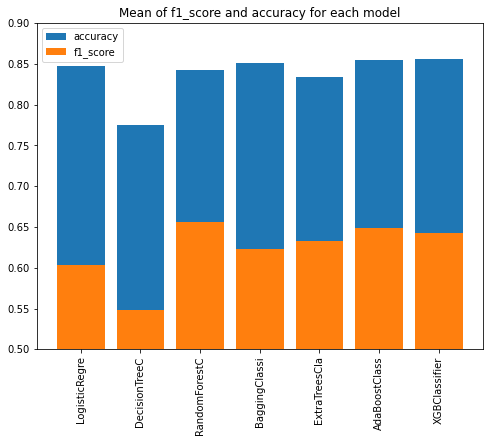

In [1022]:
f = np.array([])
ac = np.array([])
nam = np.array([])
for i in all_scores.model.unique():
    f = np.append(f, (all_scores.f1_score[all_scores.model == i].mean()))
    ac = np.append(ac, (all_scores.accuracy[all_scores.model == i].mean()))
    nam = np.append(nam, ((f'{i}')[:13]))
plt.figure(figsize=(8,6))
plt.bar(nam, ac, label = 'accuracy')
plt.bar(nam, f, label = 'f1_score')
plt.ylim(0.5,0.9)
plt.xticks(rotation = 90)
plt.legend()
plt.title('Mean of f1_score and accuracy for each model')
plt.show()

Sorted models by f1_score mean from different datasets

In [990]:
all_scores.model.unique()[f.argsort()[::-1]]

array([RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=300,
                              random_state=42)                                    ,
       AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                                max_features='auto',
                                                                min_samples_leaf=2,
                                                                random_state=42),
                          learning_rate=1, n_estimators=200, random_state=42)       ,
       XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
                     importance_type='gain', interaction_constraints='',
                     learning_rate=0.300000012, max_delta_step=0, max_depth=20,
                     min_child_weight=1, missing=nan, monotone_constraints='()',
                     n_es

Sorted models by accuracy mean from different datasets

In [989]:
all_scores.model.unique()[ac.argsort()[::-1]]

array([XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
                     importance_type='gain', interaction_constraints='',
                     learning_rate=0.300000012, max_delta_step=0, max_depth=20,
                     min_child_weight=1, missing=nan, monotone_constraints='()',
                     n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
                     reg_alpha=0.3, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
                     tree_method='exact', validate_parameters=1, verbosity=None)      ,
       AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                                max_features='auto',
                                                                min_samples_leaf=2,
                                                                random_state=42),
                  

The bests models for f1_score are made by RandomForestClassifier and AdaBoostClassifier algorithms 

The bests models for accuracy are made by XGBClassifier and AdaBoostClassifier algorithms 

#### What data preparation was the best?

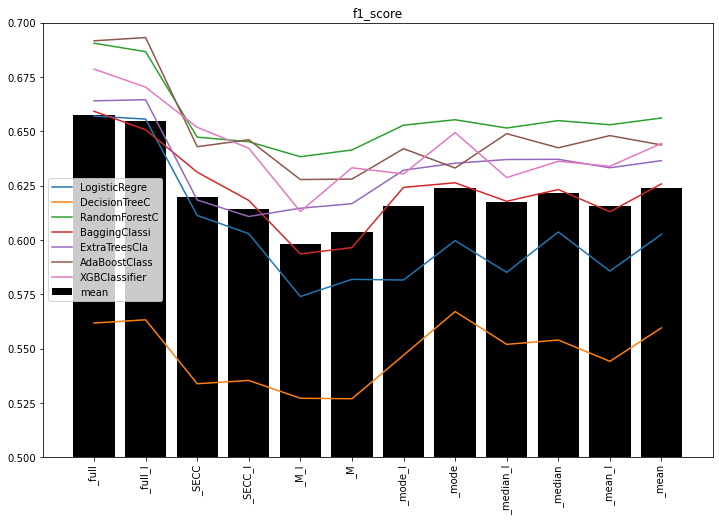

In [1082]:
mf = np.array([])
mac = np.array([])
x = all_scores.set.unique()

for i in all_scores.set.unique():
    mf = np.append(mf, all_scores.f1_score[all_scores.set == i].mean())
    mac = np.append(mac, all_scores.accuracy[all_scores.set == i].mean())
plt.figure(figsize=(12,8))
plt.bar(x, mf, color = 'k',label='mean')    
for j in all_scores.model.unique():
    plt.plot(x,(all_scores.f1_score[all_scores.model == j]), label = f'{j}'[:13])
plt.ylim(0.5,0.7)
plt.xticks(rotation = 90)
plt.title('f1_score')
plt.legend()
plt.show()


Sorted datasets by f1_score mean from models

In [976]:
all_scores.set.unique()[mf.argsort()[::-1]]

array(['_full', '_full_l', '_mean', '_mode', '_median', '_SECC',
       '_median_l', '_mean_l', '_mode_l', '_SECC_l', '_M', '_M_l'],
      dtype=object)

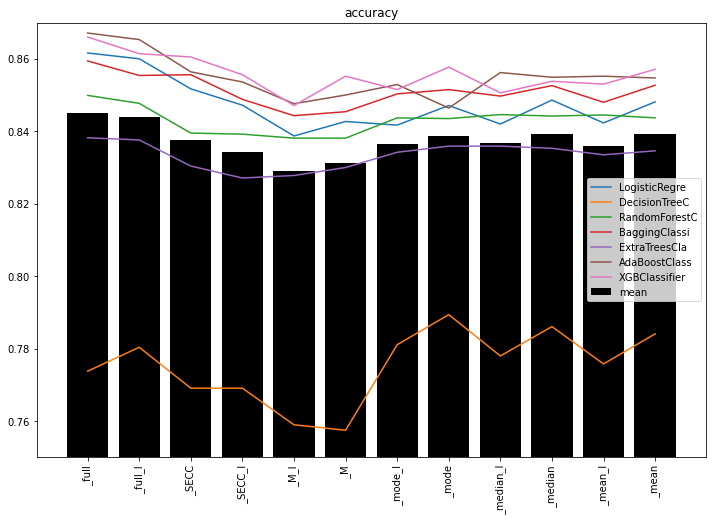

In [988]:
plt.figure(figsize=(12,8))
plt.bar(x, mac, color = 'k', label='mean')    
for k in all_scores.model.unique():
    plt.plot(x,(all_scores.accuracy[all_scores.model == k]), label = f'{k}'[:13])
plt.ylim(0.75,0.87)
plt.xticks(rotation = 90)
plt.title('accuracy')
plt.legend()
plt.show()

Sorted datasets by accuracy mean from models

In [1083]:
all_scores.set.unique()[mac.argsort()[::-1]]

array(['_full', '_full_l', '_median', '_mean', '_mode', '_SECC',
       '_median_l', '_mode_l', '_mean_l', '_SECC_l', '_M', '_M_l'],
      dtype=object)

The best f1_score

In [952]:
all_scores.loc[all_scores.f1_score.argmax()]

set                                                     _full_l
size_train                                          (79284, 66)
size_test                                            (5642, 66)
model         (DecisionTreeClassifier(max_depth=20, max_feat...
accuracy                                                 0.8653
f1_score                                                 0.6931
Name: 12, dtype: object

In [1068]:
all_scores.loc[all_scores.f1_score.argmax()].model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features='auto',
                                                         min_samples_leaf=2,
                                                         random_state=42),
                   learning_rate=1, n_estimators=200, random_state=42)

Sorted datasets by accuracy mean from models

The best accuracy

In [965]:
all_scores.loc[all_scores.accuracy.argmax()]

set                                                       _full
size_train                                          (79284, 92)
size_test                                            (5642, 92)
model         (DecisionTreeClassifier(max_depth=20, max_feat...
accuracy                                                 0.8671
f1_score                                                 0.6916
Name: 5, dtype: object

Scores for model with the best f1_score - RandomForestClassifier sorted by f1_score

In [998]:
all_scores[all_scores.model == all_scores.model.loc[2]].sort_values('f1_score',ascending=False)

,set,size_train,size_test,model,accuracy,f1_score
2,_full,"(79284, 92)","(5642, 92)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8499,0.6905
9,_full_l,"(79284, 66)","(5642, 66)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8477,0.6866
79,_mean,"(197384, 115)","(14079, 115)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8437,0.6561
51,_mode,"(197384, 115)","(14079, 115)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8435,0.6553
65,_median,"(197384, 115)","(14079, 115)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8442,0.6549
72,_mean_l,"(197384, 66)","(14079, 66)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8445,0.6530
44,_mode_l,"(197384, 66)","(14079, 66)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8437,0.6528
58,_median_l,"(197384, 66)","(14079, 66)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8446,0.6515
16,_SECC,"(158242, 106)","(11293, 106)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8395,0.6473
23,_SECC_l,"(158242, 62)","(11293, 62)","(DecisionTreeClassifier(max_depth=20, max_feat...",0.8392,0.6452


In [1029]:
d = (all_scores[all_scores.model == all_scores.model.loc[2]].sort_values("f1_score",ascending=False).iloc[0,5] - \
     all_scores[all_scores.model == all_scores.model.loc[2]].sort_values("f1_score",ascending=False).iloc[2,5])*100
print(f'{round(d,2)}% difference in f1_score compared to the best model with filled data (df_mean) and model with full original data (df_full)')

3.44% difference in f1_score compared to the best model with filled data (df_mean) and model with full original data (df_full)


In [1030]:
d = (all_scores[all_scores.model == all_scores.model.loc[2]].sort_values("f1_score",ascending=False).iloc[0,5] - \
     all_scores[all_scores.model == all_scores.model.loc[2]].sort_values("f1_score",ascending=False).iloc[-1,5])*100
print(f'{round(d,2)}% difference in f1_score compared to the worst model filled data (df_M_l) and model with full original data (df_full)')

5.22% difference in f1_score compared to the worst model filled data (df_M_l) and model with full original data (df_full)


Scores for model with the best accuracy  - XGBClassifier sorted by accuracy

In [1060]:
all_scores[all_scores.model == all_scores.model.loc[6]].sort_values('accuracy',ascending=False)

,set,size_train,size_test,model,accuracy,f1_score
6,_full,"(79284, 92)","(5642, 92)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8660,0.6786
13,_full_l,"(79284, 66)","(5642, 66)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8614,0.6703
20,_SECC,"(158242, 106)","(11293, 106)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8605,0.6518
55,_mode,"(197384, 115)","(14079, 115)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8577,0.6494
83,_mean,"(197384, 115)","(14079, 115)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8571,0.6444
27,_SECC_l,"(158242, 62)","(11293, 62)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8556,0.6422
41,_M,"(197384, 115)","(14079, 115)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8552,0.6332
69,_median,"(197384, 115)","(14079, 115)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8538,0.6362
76,_mean_l,"(197384, 66)","(14079, 66)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8530,0.6339
48,_mode_l,"(197384, 66)","(14079, 66)","XGBClassifier(base_score=0.5, booster='gbtree'...",0.8515,0.6304


In [1062]:
d = (all_scores[all_scores.model == all_scores.model.loc[6]].sort_values("accuracy",ascending=False).iloc[0,5] - \
     all_scores[all_scores.model == all_scores.model.loc[6]].sort_values("accuracy",ascending=False).iloc[3,5])*100
print(f'{round(d,2)}% difference in accuracy compared to the best model with filled data (df_mode) and model with full original data (df_full)')

2.92% difference in accuracy compared to the best model with filled data (df_mode) and model with full original data (df_full)


In [1064]:
d = (all_scores[all_scores.model == all_scores.model.loc[6]].sort_values("accuracy",ascending=False).iloc[0,5] - \
     all_scores[all_scores.model == all_scores.model.loc[6]].sort_values("accuracy",ascending=False).iloc[-1,5])*100
print(f'{round(d,2)}% difference in accuracy compared to the worst model with filled data (df_M_l) and model with full original data (df_full)')

6.55% difference in accuracy compared to the worst model with filled data (df_M_l) and model with full original data (df_full)


In [1072]:
print(f'{round((1-(23/49))*100)}% of not missing location in df_full')

53% of not missing location in df_full


## 9. Summary

Becouse data is imbalanced the better metric is f1_score.

The best f1_score (69.31%) is for ADABoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2, random_state=42), learning_rate=1, n_estimators=200, random_state=42) - for data with only full original data (df_full). But drop all missing data caused eliminate 38.79% of data including 23 locations from 49. The model is usefull only for 53% of locations. 

Replacement the missing data resulted a decrease of the f1_score <3.44% - 5.22%> for the estimator with the best mean f1_score - RandomForestClassifier and an increase utility to 100%. 

The best replacement for missing data is replace numeric variables by mean and object variables by random sample of from not missing items (df_mean).  f1_score ↓ by 3.44%

The worst replacment for missing data is replace all variables by random sample of from not missing items for every month (df_M). f1_score ↓ by 5.22%

Models which included locations have better f1_score, but dropping locations will decrease f1_score by less than 1% and increase utility of models for new locations.